In [15]:
import os
import matplotlib.pyplot as plt

In [16]:
from keras.utils import np_utils

In [17]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [18]:
from tensorflow.keras.models import model_from_json

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
import numpy as np

In [21]:
tf.__version__

'2.3.0-dev20200615'

In [22]:
files_train = 0
files_validation = 0

cwd = os.getcwd()
folder = 'train_data/train'
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_train += len(files)


folder = 'train_data/test'
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_validation += len(files)

print(files_train,files_validation)

381 164


In [23]:
img_width, img_height = 48, 48
train_data_dir = "train_data/train"
validation_data_dir = "train_data/test"
nb_train_samples = files_train
nb_validation_samples = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [24]:
import glob
train_empty = glob.glob('train_data/train/empty/*.*')
train_occupied = glob.glob('train_data/train/occupied/*.*')
val_empty = glob.glob('train_data/test/empty/*.*')
val_occupied = glob.glob('test_data/test/occupied/*.*')

data = []
labels = []

for i in train_empty:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_height, img_width))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in train_occupied:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_height, img_width))
    image=np.array(image)
    data.append(image)
    labels.append(1)

for i in val_empty:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_height, img_width))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in val_occupied:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_height, img_width))
    image=np.array(image)
    data.append(image)
    labels.append(1)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(335, 48, 48, 3)
(335,)
(84, 48, 48, 3)
(84,)


In [26]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

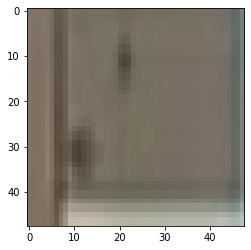

In [27]:
plt.imshow(X_train[2])

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 96)          55392     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 96)         

In [30]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [31]:
# checkpoint
filepath="parking_classification.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [32]:
# Fit the model
#model.fit(X_train, ytrain, epochs=10, batch_size=20,  verbose=1)
#model.fit(trainImages, trainLabels, validation_split=0.33, epochs=25, batch_size=10, callbacks=callbacks_list, verbose=0)
history_object=model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=(X_test, y_test),callbacks=callbacks_list, verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [34]:
y_predict = model.predict(X_test)

In [35]:
l = np.rint(y_predict)
print(l.reshape(-1))
#print(np.argmax(y_predict,axis=1))
print(len(y_predict))

[1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]
84


In [36]:
print(y_test)

[1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 1 0 0 1 0 0]


In [37]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 12ms/step - loss: 0.1865 - accuracy: 0.9643


[0.18653081357479095, 0.9642857313156128]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


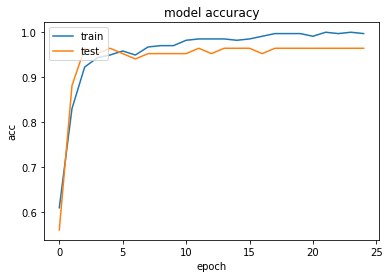

In [38]:
import matplotlib.pyplot as plt
print(history_object.history.keys())
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

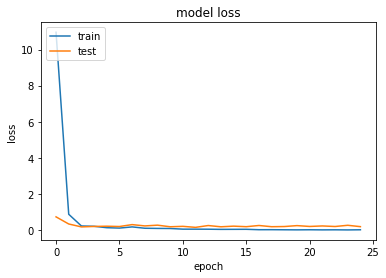

In [39]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
f1="carpark_o_1.png"
f2="carpark_o_2.png"
f3="carpark_o_3.png"
f4="carpark_e_1.png"
f5="carpark_e_2.png"
f6="carpark_e_3.png"
image=tf.keras.preprocessing.image.load_img(f1, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)

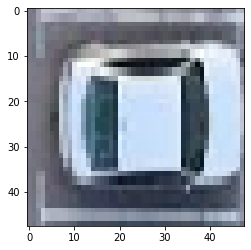

In [41]:
plt.imshow(image)

In [42]:
image=tf.keras.preprocessing.image.load_img(f1, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)
image.reshape(1,48,48,3)
model.predict(image.reshape(1,48,48,3))

array([[1.]], dtype=float32)

In [43]:
image= tf.keras.preprocessing.image.load_img(f2, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)
image.reshape(1,48,48,3)
model.predict(image.reshape(1,48,48,3))

array([[1.]], dtype=float32)

In [44]:
image= tf.keras.preprocessing.image.load_img(f3, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)
image.reshape(1,48,48,3)
model.predict(image.reshape(1,48,48,3))

array([[1.]], dtype=float32)

In [45]:
test_6 = image=tf.keras.preprocessing.image.load_img(f6, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)
image.reshape(1,48,48,3)
model.predict(image.reshape(1,48,48,3))

array([[0.00011127]], dtype=float32)

In [46]:
image= tf.keras.preprocessing.image.load_img(f5, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)
image.reshape(1,48,48,3)
model.predict(image.reshape(1,48,48,3))

array([[1.5130518e-05]], dtype=float32)

In [47]:
image= tf.keras.preprocessing.image.load_img(f4, color_mode='rgb', target_size= (img_height, img_width))
image=np.array(image)
image.reshape(1,48,48,3)
model.predict(image.reshape(1,48,48,3))

array([[0.00043675]], dtype=float32)

In [48]:
# serialize model to JSON
model_json = model.to_json()
with open("carpark_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("carpark_model.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
#from tensorflow.contrib import lite
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('parking_classification.hdf5')
tfmodel = converter.convert()
open("carpark_model.tflite","wb").write(tfmodel)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tenso

2009248